In [30]:
import pandas as pd
import numpy as np

# Read the data
with open('data/ds_salaries.csv', 'r') as f:
    salary = pd.read_csv(f)

In [31]:
salary.head()

,index,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


For ML purposes, we can drop salary, salary_currency

In [32]:
salary_clean = salary.drop(['salary', 'salary_currency'], axis=1)
salary_clean.head()

,index,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


Let's see how many employee_residences are same as company_locations

In [33]:
salary_clean[salary_clean['employee_residence'] == salary_clean['company_location']].value_counts()

index  work_year  experience_level  employment_type  job_title                  salary_in_usd  employee_residence  remote_ratio  company_location  company_size
0      2020       MI                FT               Data Scientist             79833          DE                  0             DE                L               1
413    2022       MI                FT               Data Engineer              49461          GR                  100           GR                M               1
407    2022       SE                FT               Data Engineer              183600         US                  100           US                L               1
408    2022       MI                FT               Data Analyst               52351          GB                  100           GB                M               1
409    2022       SE                FT               Data Scientist             180000         US                  100           US                M               1
               

As those that are not represent less than 10% of our set, we canb drop column employee_residence

In [34]:
salary_clean = salary_clean.drop(['employee_residence'], axis=1)
salary_clean.head()

,index,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,79833,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,109024,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,50,US,L


Let's see how many job titles we've got

In [35]:
salary_clean.job_title.value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

To reduce the number of job titles, we can group them

- All different sorts of analysts can be grouped into one category Data Analyst
- Principals, Directors and Leads can be grouped into one category Lead
- Data Science Manager, Data Analytics Manager, Data Engineering Manager can be grouped into one category Data Manager
- Big Data Architect, ETL developer, Big Data Engineer, Data Science Engineer, Data Analytics Engineer, Data Engineer can be grouped into one category Data Engineer
- ML engineer, NLP engineer, Computer Vision Engineer, Computer Vision Software Engineer, Machine Learning Infrastructure Engineer, Machine Learning Developer can be grouped into one category ML Engineer
- All different sorts of scientists can be grouped into one category Research Scientist, except of Data Scientist and Applied Data Scientist

So we can group job titles into 6 categories

In [36]:
data_manager = ['Data Science Manager', 'Data Analytics Manager', 
                'Data Engineering Manager', 'Machine Learning Manager']
data_engineer = ['Big Data Architect', 'ETL Developer', 'Big Data Engineer', 'Data Science Engineer', 
                'Data Analytics Engineer', 'Cloud Data Engineer', 'Data Architect', 'Analytics Engineer']
ml_engineer = ['Machine Learning Engineer', 'NLP Engineer', 'Computer Vision Engineer', 'Computer Vision Software Engineer', 
               'Machine Learning Infrastructure Engineer', 'Machine Learning Developer']

def job_title_cleaner(job_title):
    if 'Lead' in job_title or 'Director' in job_title or 'Principal' in job_title:
        return 'Lead'
    elif 'Head' in job_title:
        return 'Head'
    elif 'Analyst' in job_title:
        return 'Data Analyst'
    elif 'Data Scientist' in job_title or 'Data Science Consultant' in job_title:
        return 'Data Scientist'
    elif 'Scientist' in job_title or 'Researcher' in job_title:
        return 'Research Scientist'
    elif job_title in data_manager:
        return 'Data Manager'
    elif job_title in data_engineer:
        return 'Data Engineer'
    elif job_title in ml_engineer:
        return 'ML Engineer'
    elif 'Applied Data Scientist' in job_title or 'Data Specialist' in job_title:
        return 'Data Scientist'
    else:
        return job_title

salary_clean['job_title'] = salary_clean['job_title'].apply(job_title_cleaner)
salary_clean.job_title.value_counts()

Data Engineer         167
Data Scientist        157
Data Analyst          114
ML Engineer            63
Research Scientist     36
Lead                   35
Data Manager           25
Head                   10
Name: job_title, dtype: int64

So we have 6 categories of job titles. Let's categorize salary_in_usd into 5 categories

In [37]:
salary_clean['salary_level'] = salary_clean['salary_in_usd'].apply(lambda x: x > 100000)
salary_clean['salary_level'] = salary_clean['salary_level'].astype(int)
salary_clean.head()

,index,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size,salary_level
0,0,2020,MI,FT,Data Scientist,79833,0,DE,L,0
1,1,2020,SE,FT,Research Scientist,260000,0,JP,S,1
2,2,2020,SE,FT,Data Engineer,109024,50,GB,M,1
3,3,2020,MI,FT,Data Analyst,20000,0,HN,S,0
4,4,2020,SE,FT,ML Engineer,150000,50,US,L,1


Let's look what they represent

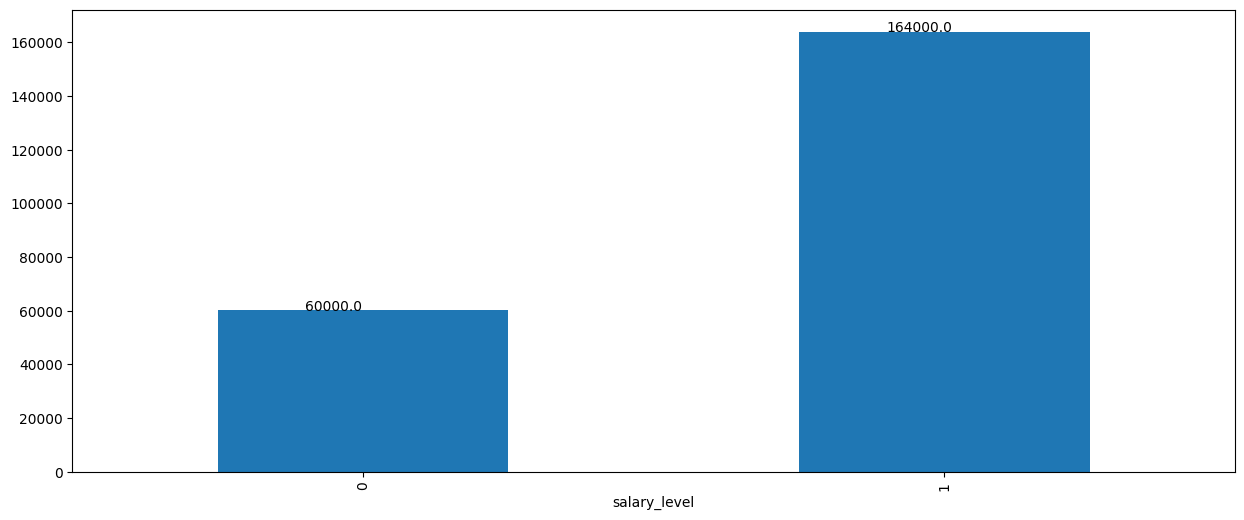

In [38]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 6))
salary_clean.groupby('salary_level')['salary_in_usd'].mean().plot(kind='bar')
# Plot the data labels
for i, v in enumerate(salary_clean.groupby('salary_level')['salary_in_usd'].mean()):
    plt.text(i-0.1, v, str(round(v, -3)))
plt.show()

Let's look at countries

In [39]:
salary_clean.company_location.value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64

Those will be painful to group, so let's check if we can drop some

In [40]:
country_counts = salary_clean.company_location.value_counts()
sum(country_counts[country_counts < 10])

83

Since it's not a lot, we can drop them

In [41]:
salary_clean = salary_clean[salary_clean.company_location.isin(country_counts[country_counts > 10].index)]
salary_clean.company_location.value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
Name: company_location, dtype: int64

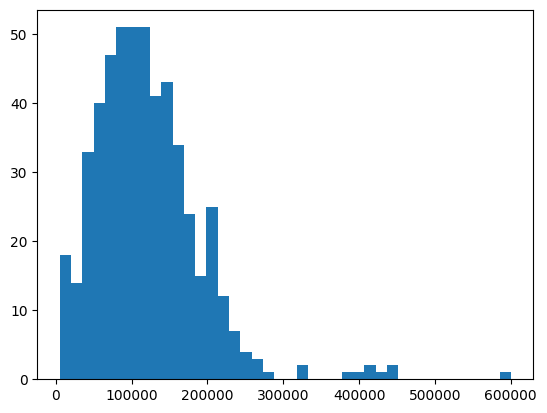

In [42]:
plt.hist(salary_clean['salary_in_usd'], bins=40)    
plt.show()

Now we can label encode job titles, countries, company_size, employment_type and experience_level 

In [43]:
from sklearn.preprocessing import LabelEncoder
le_exp = LabelEncoder()
le_emp_type = LabelEncoder()
le_job_title = LabelEncoder()
le_company_location = LabelEncoder()
le_company_size = LabelEncoder()

salary_clean['experience'] = le_exp.fit_transform(salary_clean['experience_level'])
salary_clean['type'] = le_emp_type.fit_transform(salary_clean['employment_type'])
salary_clean['title'] = le_job_title.fit_transform(salary_clean['job_title'])
salary_clean['location'] = le_company_location.fit_transform(salary_clean['company_location'])
salary_clean['size'] = le_company_size.fit_transform(salary_clean['company_size'])
salary_clean.head()


,index,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size,salary_level,experience,type,title,location,size
0,0,2020,MI,FT,Data Scientist,79833,0,DE,L,0,2,2,3,1,0
2,2,2020,SE,FT,Data Engineer,109024,50,GB,M,1,3,2,1,4,1
4,4,2020,SE,FT,ML Engineer,150000,50,US,L,1,3,2,6,7,0
5,5,2020,EN,FT,Data Analyst,72000,100,US,L,0,0,2,0,7,0
6,6,2020,SE,FT,Lead,190000,100,US,S,1,3,2,5,7,2


In [44]:
cols = ['location', 'experience', 'type', 'title', 'remote_ratio', 'size', 'salary_level']
salary_ml = salary_clean[cols]
salary_ml.head()

,location,experience,type,title,remote_ratio,size,salary_level
0,1,2,2,3,0,0,0
2,4,3,2,1,50,1,1
4,7,3,2,6,50,0,1
5,7,0,2,0,100,0,0
6,7,3,2,5,100,2,1


Use KFold to find best model

In [100]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

X = salary_ml.drop(['salary_level'], axis=1)
y = salary_ml['salary_level']

skf = StratifiedKFold(n_splits=30, shuffle=True)

lr_scores = cross_val_score(LinearRegression(), X, y, cv=skf)
logr_scores = cross_val_score(LogisticRegression(max_iter=1000), X, y, cv=skf)
dt_scores = cross_val_score(tree.DecisionTreeClassifier(), X, y, cv=skf)
rf_scores = cross_val_score(RandomForestClassifier(n_estimators=100), X, y, cv=skf)
gbc_scores = cross_val_score(GradientBoostingClassifier(), X, y, cv=skf)
svc_scores = cross_val_score(SVC(), X, y, cv=skf)

print('Linear Regression: ', np.mean(lr_scores))
print('Decision Tree: ', np.mean(dt_scores))
print('Random Forest: ', np.mean(rf_scores))
print('Logistic Regression: ', np.mean(logr_scores))
print('Gradient Boosting: ', np.mean(gbc_scores))
print('SVC: ', np.mean(svc_scores))

Linear Regression:  0.29892272308927714
Decision Tree:  0.7857298474945534
Random Forest:  0.8055555555555557
Logistic Regression:  0.7667755991285404
Gradient Boosting:  0.812091503267974
SVC:  0.5815904139433551


Decision Tree, Random Forest and GB perform best

Let's try harder task

In [89]:
salary_clean['salary_level2'] = pd.qcut(salary_clean['salary_in_usd'], 2, labels=[1, 2])
salary_clean.head()

,index,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size,salary_level,experience,type,title,location,size,salary_level2
0,0,2020,MI,FT,Data Scientist,79833,0,DE,L,0,2,2,3,1,0,1
2,2,2020,SE,FT,Data Engineer,109024,50,GB,M,1,3,2,1,4,1,1
4,4,2020,SE,FT,ML Engineer,150000,50,US,L,1,3,2,6,7,0,2
5,5,2020,EN,FT,Data Analyst,72000,100,US,L,0,0,2,0,7,0,1
6,6,2020,SE,FT,Lead,190000,100,US,S,1,3,2,5,7,2,2


In [90]:
cols = ['location', 'experience', 'title', 'remote_ratio', 'size', 'salary_level2']
salary_ml2 = salary_clean[cols]
salary_ml2.head()

,location,experience,title,remote_ratio,size,salary_level2
0,1,2,3,0,0,1
2,4,3,1,50,1,1
4,7,3,6,50,0,2
5,7,0,0,100,0,1
6,7,3,5,100,2,2


In [103]:
X = salary_ml2.drop(['salary_level2'], axis=1)
y = salary_ml2['salary_level2']

skf = StratifiedKFold(n_splits=20, shuffle=True)

lr_scores = cross_val_score(LinearRegression(), X, y, cv=skf)
logr_scores = cross_val_score(LogisticRegression(max_iter=1000), X, y, cv=skf)
dt_scores = cross_val_score(tree.DecisionTreeClassifier(), X, y, cv=skf)
rf_scores = cross_val_score(RandomForestClassifier(n_estimators=100), X, y, cv=skf)
gbc_scores = cross_val_score(GradientBoostingClassifier(), X, y, cv=skf)

print('Linear Regression: ', np.mean(lr_scores))
print('Logistic Regression: ', np.mean(logr_scores))
print('Decision Tree: ', np.mean(dt_scores))
print('Random Forest: ', np.mean(rf_scores))
print('Gradient Boosting: ', np.mean(gbc_scores))

Linear Regression:  0.27068664618802385
Logistic Regression:  0.7401709401709403
Decision Tree:  0.7181623931623932
Random Forest:  0.7226495726495725
Gradient Boosting:  0.7672364672364672


Let's look at confusion matrix of GBC

Accuracy:  0.7924528301886793


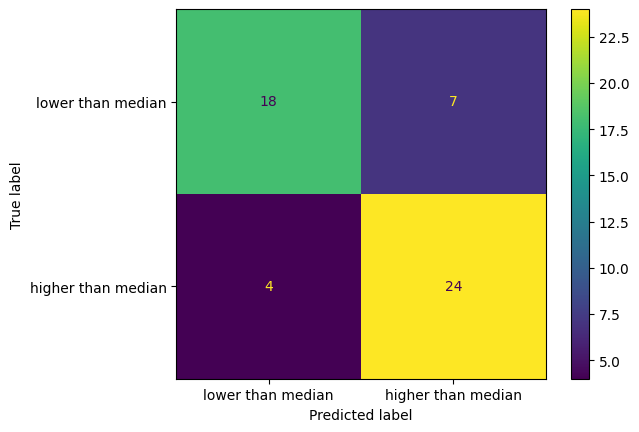

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)    
print('Accuracy: ', accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['lower than median', 'higher than median'])
disp.plot()
plt.show()